### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/AL MADINA COMPUTER/Desktop/Machine Learning/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Describing the columns to gain more insights about what their values represent:

Age : Indicates the age of patient

Anemia: 0 =NO , 1=YES ; Anemia is when the body does not have enough red blood cells.

Creatine_phosphokinase(CPK is modified version in my data) : Level of the CPK enzyme in the blood (mcg/L).

Diabetes : 0=NO ,1=YES ; Fasting blood glucose level in healthy individuals is in the range of 70-100 mg / dL. If the level of sugar in the blood exceeds this range, it usually indicates diabetes.

Ejection_fraction: The percentage of blood pumping into the heart. normal is 55% and above.

High_blood_pressure(HBP is modified version in my data) : 0=NO, 1=YES ; Whether the patient has high blood pressure or not.

Platelets: Platelet is the name given to the cells involved in the formation of blood clots. The normal value of thrombocyte in the blood is 150 thousand between 450 thousand in one mm3 of blood.

Serum_creatinine : Level of Creatine produced from the kidneys in the blood.

Serum_sodium : Level of serum creatinine in the blood. The normal range for sodium in the blood is 135-145 mEq / L. A situation with more than 145 millimoles of sodium in a liter of blood means that the body loses more water than it enters the body.

Sex: 0=FEMALE , 1=MALE ; Gender of patient.

Smoking : 0=NOT SMOKING, 1=SMOKING.

Time : Follow up days.

Death_event: Whether patient died during follow up period.

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.shape

(299, 13)

In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Outliers Detection

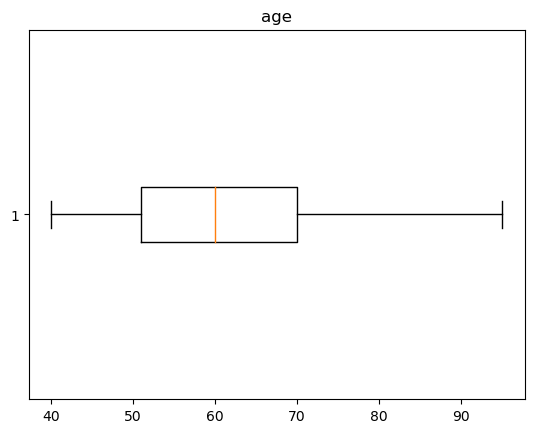

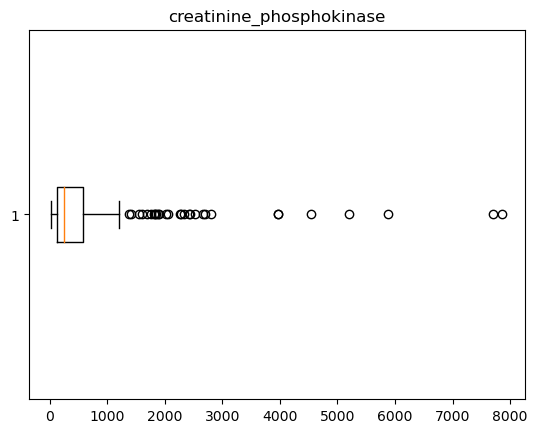

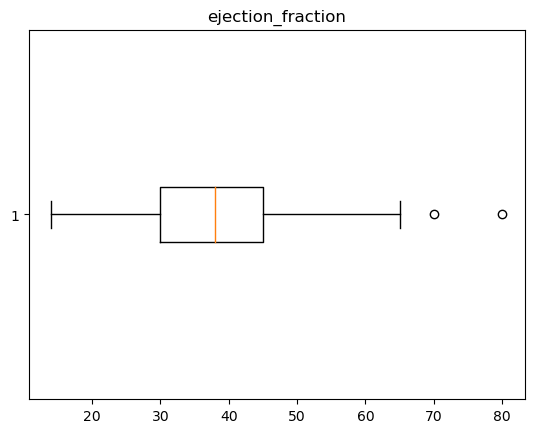

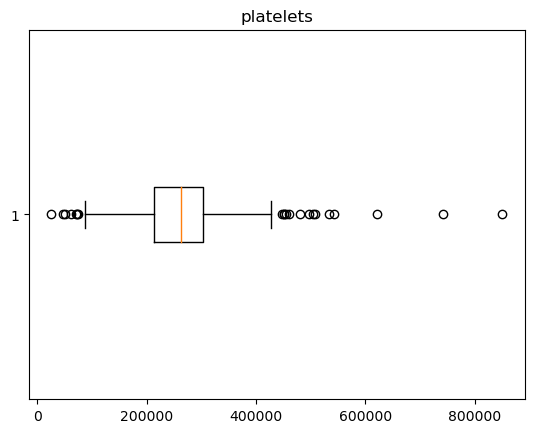

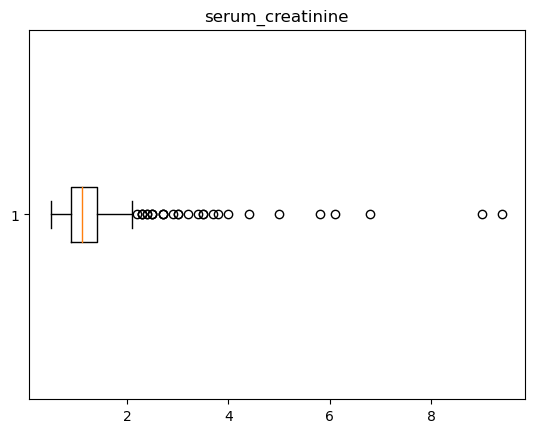

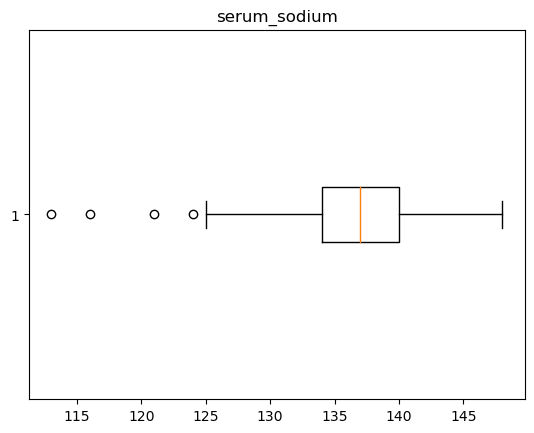

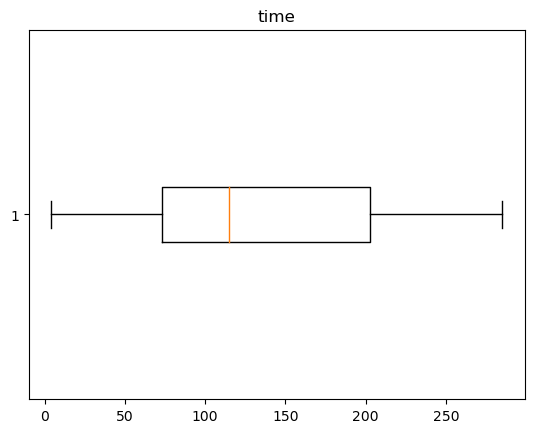

In [18]:
num_col=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in df[num_col]:
    plt.boxplot(df[col],vert=False)
    plt.title(col)
    plt.show()



### Removing Outliers

In [19]:


def remove_outliers(df):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df= remove_outliers(df)


### Feature Distribution

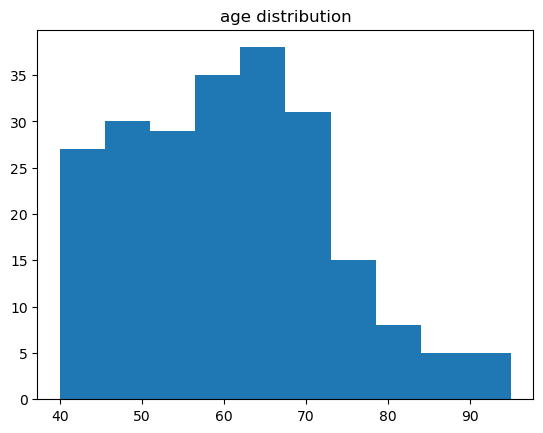

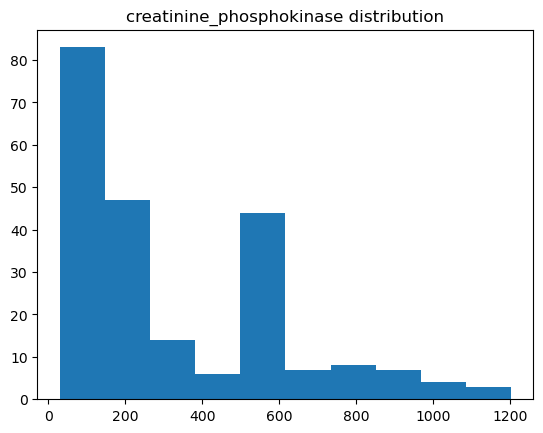

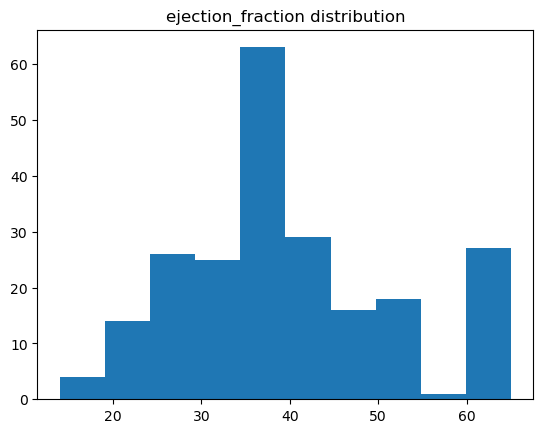

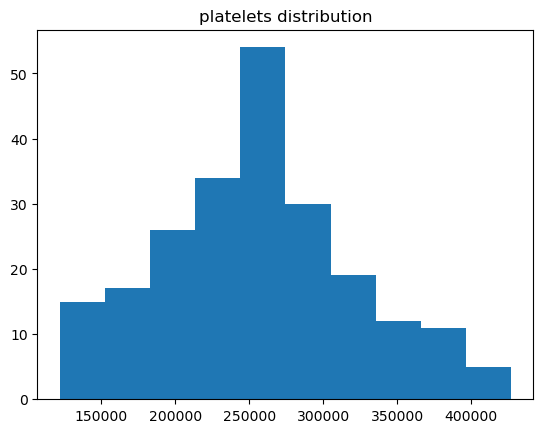

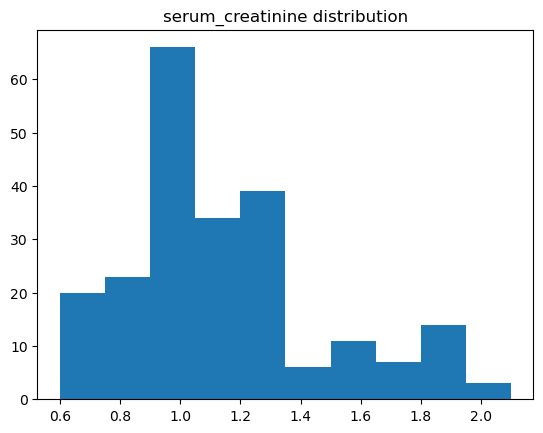

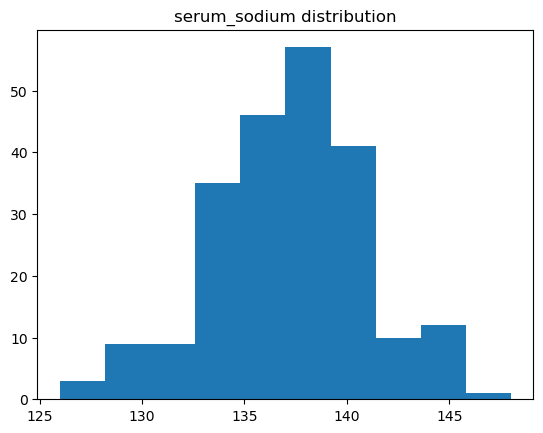

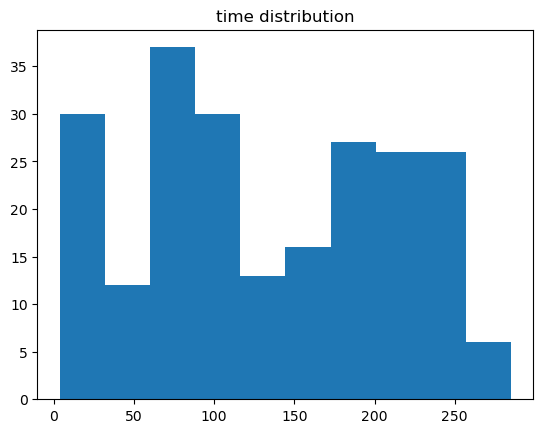

In [25]:
for i in num_col:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

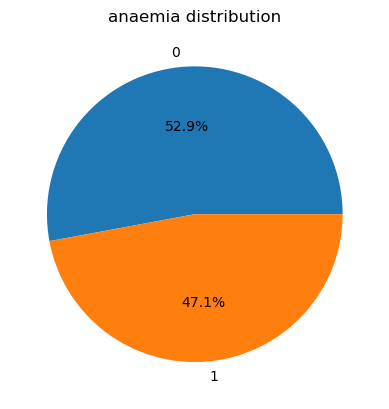

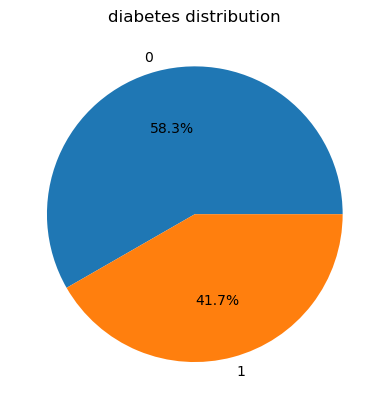

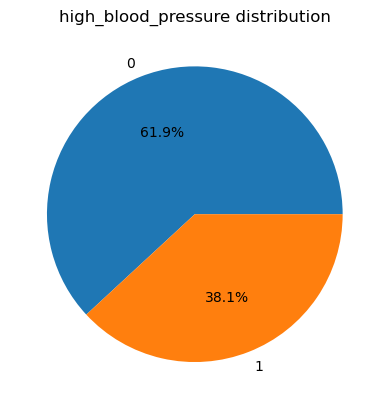

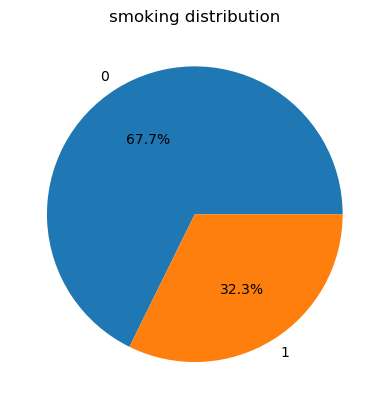

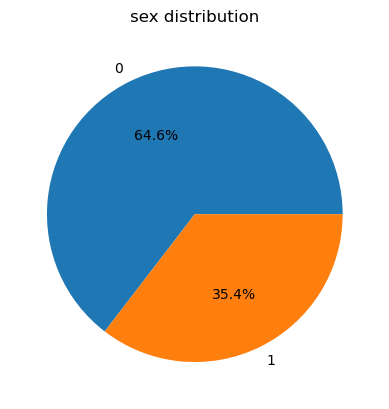

In [26]:
#Distribution of Categorical Feature

categorical_fea= ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'sex']

for i in categorical_fea:
    plt.pie(df[i].value_counts(), autopct='%1.1f%%', labels=[0,1])
    plt.title(i + ' distribution')
    plt.show()

In [27]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


Text(0.5, 1.0, 'Death Rate Distribution')

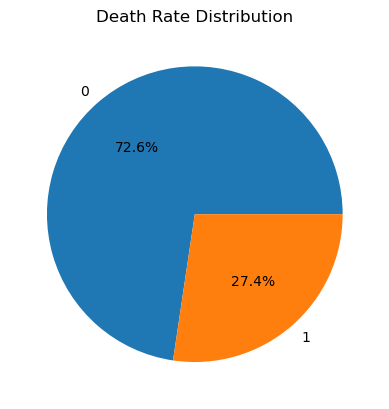

In [30]:
#distribution of target variable
plt.pie(df['DEATH_EVENT'].value_counts(), autopct='%1.1f%%', labels=[0,1])
plt.title('Death Rate Distribution')


### EDA


#### Numerical VS target Feature

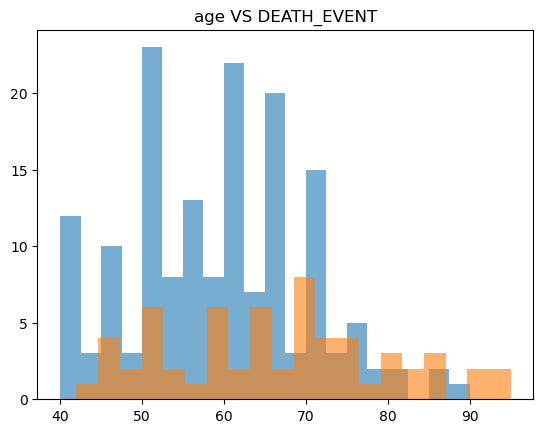

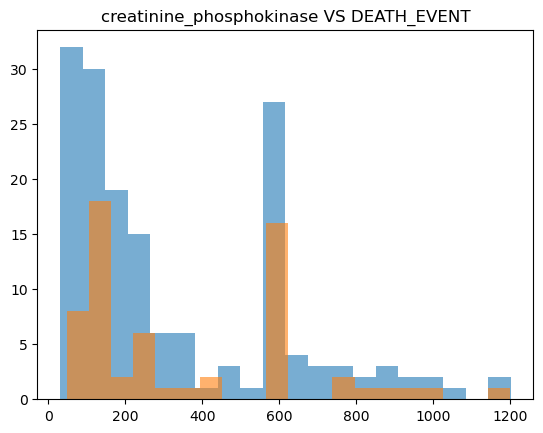

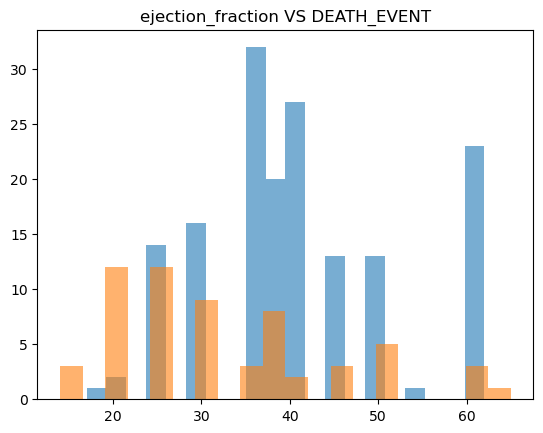

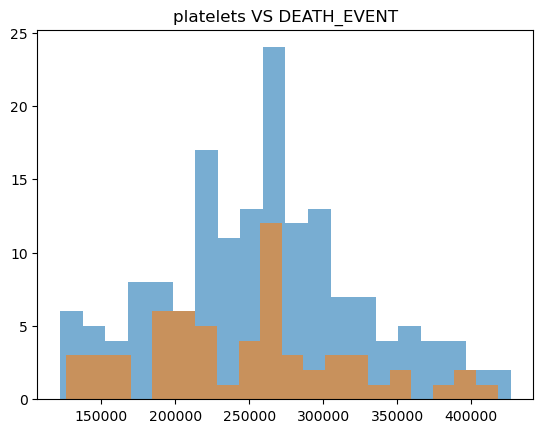

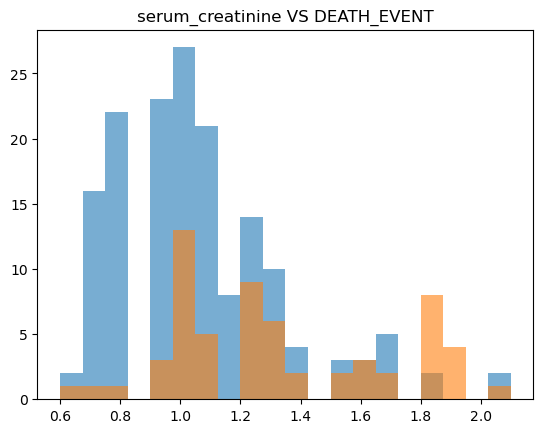

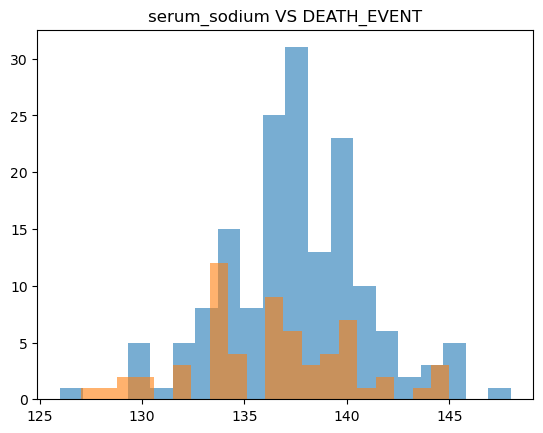

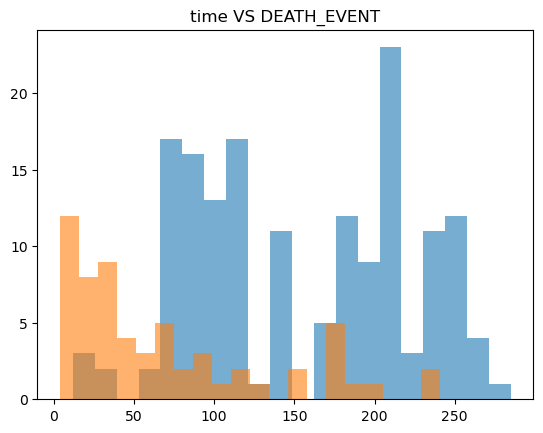

In [35]:

for i in num_col:
    plt.hist(df[df['DEATH_EVENT']==0][i], bins=20, alpha=0.6)
    plt.hist(df[df['DEATH_EVENT']==1][i], bins=20, alpha=0.6)
    plt.title(i + ' VS DEATH_EVENT')
    plt.show()


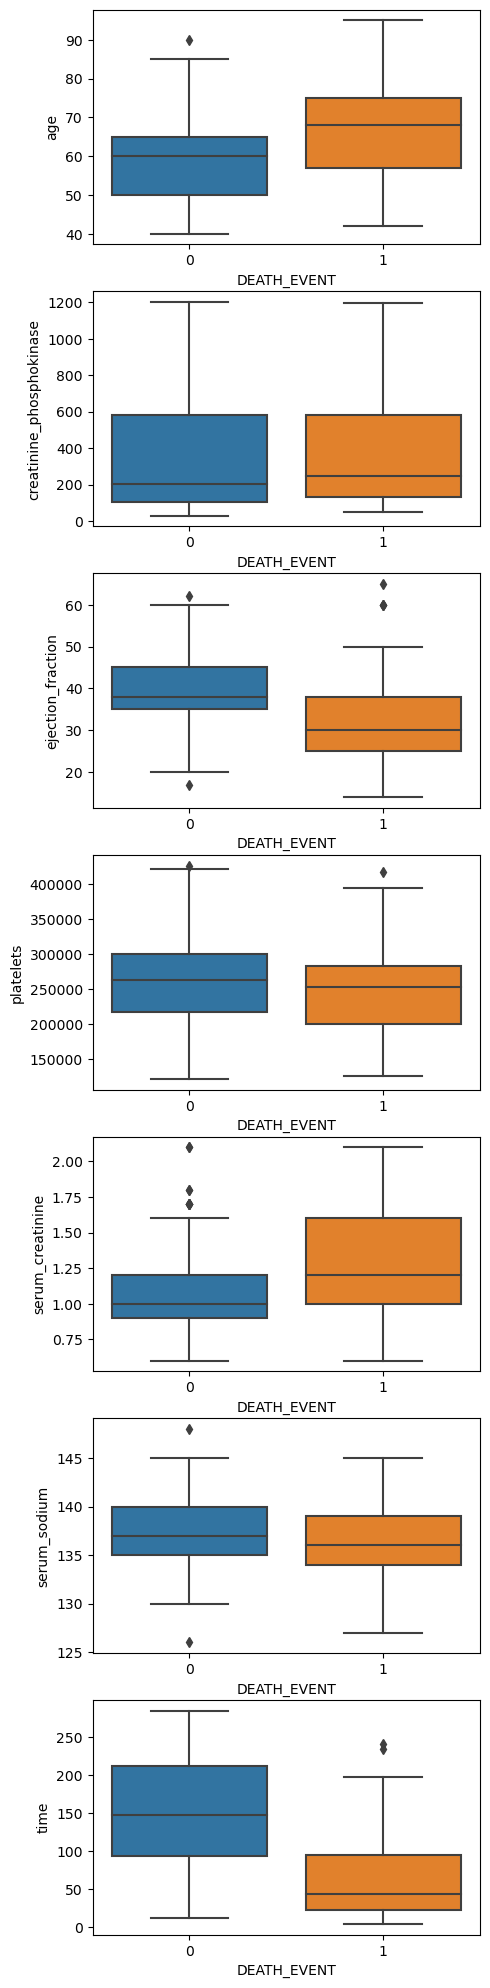

In [37]:
index = 0
plt.figure(figsize=(5,25))
for feature in num_col:
    index += 1
    plt.subplot(7, 1, index)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df)

**insights**:

1. Cases of **DEATH_EVENT** start **after the age of 40**. Some specific peaks of high cases of DEATH_EVENT can be observed at **45, 50, 60, 65, 70, 75, 80 and 90**. Also, the ratio of unsurvived/survived increases dramatically after the age of **70**.
2. High cases of **DEATH_EVENT** can be observed for **ejaction_fraction under 40%**.
3. **serum_creatinine** values **higher than 1.2** have higher probability to lead to **DEATH_EVENT**.
4. people with **serum_sodium** values **127 - 145** are more prone to **DEATH_EVENT** due to heart failure.
5. **platelets** range from **2x10^5 - 3x10^5** indicate more chance of heart failure.
6. **time** in the range of **25 - 100** is a strong indicator of for **DEATH_EVENT**.

### Categorical vs Target Feature

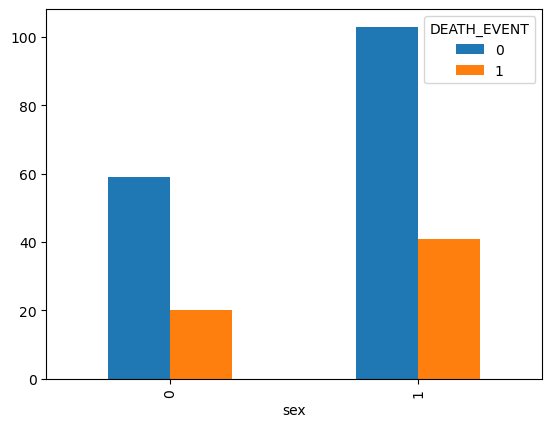

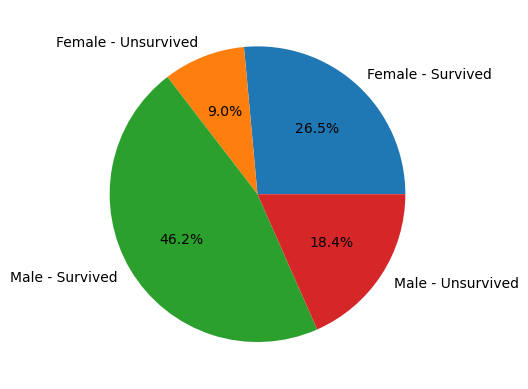

In [40]:
grouped_sex= df.groupby(['sex', 'DEATH_EVENT']).size()
grouped_sex.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_sex, labels=['Female - Survived', 'Female - Unsurvived', 'Male - Survived', 'Male - Unsurvived'], autopct='%1.1f%%')
plt.show()


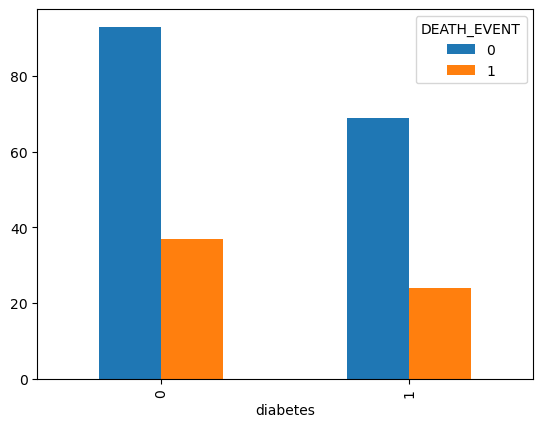

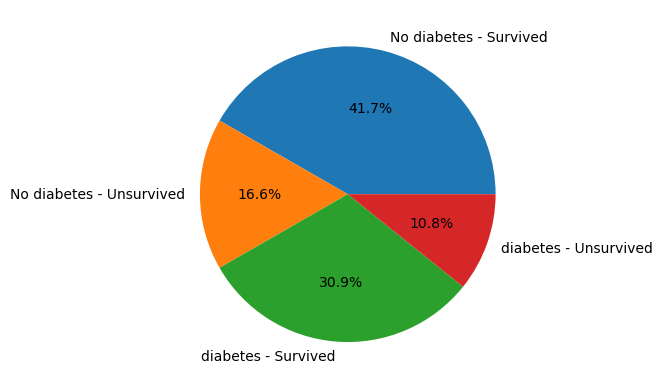

In [41]:
grouped_diabetes= df.groupby(['diabetes', 'DEATH_EVENT']).size()
grouped_diabetes.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_diabetes, labels=['No diabetes - Survived', 'No diabetes - Unsurvived', 'diabetes - Survived', 'diabetes - Unsurvived'], autopct='%1.1f%%')
plt.show()

In [42]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


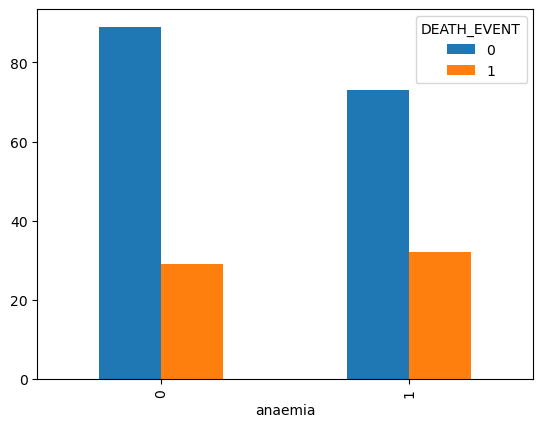

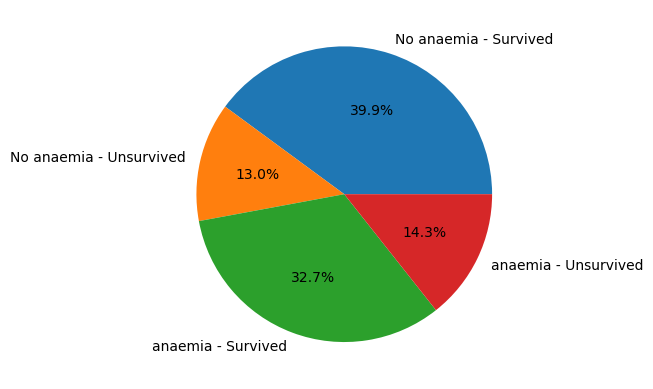

In [44]:
grouped_anaemia= df.groupby(['anaemia', 'DEATH_EVENT']).size()
grouped_anaemia.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_anaemia, labels=['No anaemia - Survived', 'No anaemia - Unsurvived', 'anaemia - Survived', 'anaemia - Unsurvived'], autopct='%1.1f%%')
plt.show()

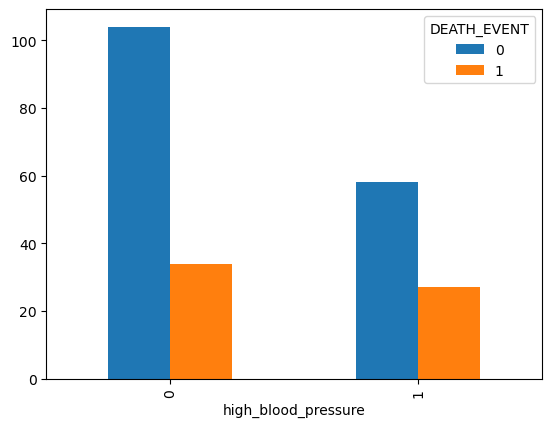

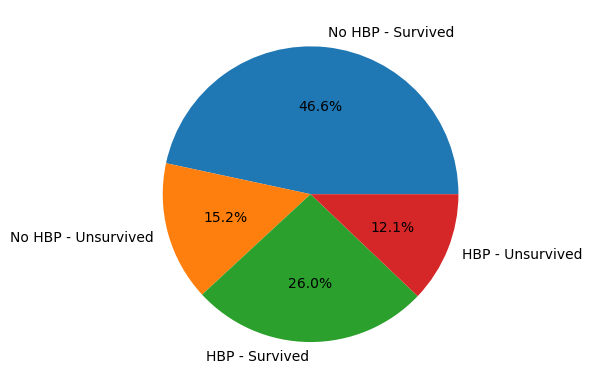

In [45]:
grouped_high_blood_pressure= df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
grouped_high_blood_pressure.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_high_blood_pressure, labels=['No HBP - Survived', 'No HBP - Unsurvived', 'HBP - Survived', 'HBP - Unsurvived'], autopct='%1.1f%%')
plt.show()

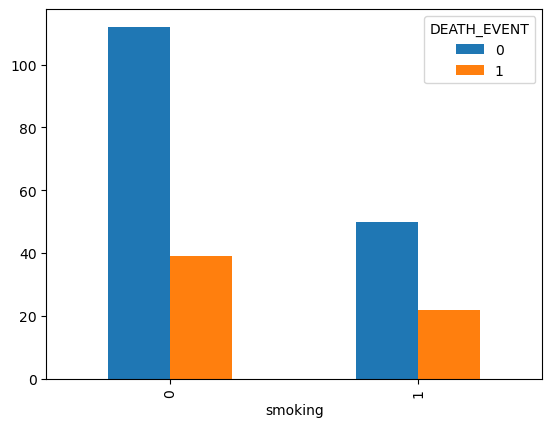

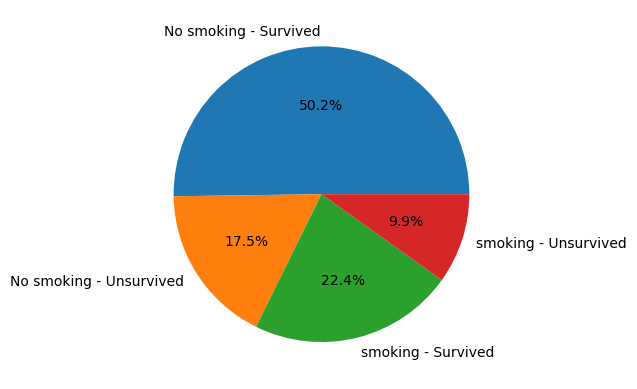

In [46]:
grouped_smoking= df.groupby(['smoking', 'DEATH_EVENT']).size()
grouped_smoking.unstack().plot(kind='bar')
plt.show()
plt.pie(grouped_smoking, labels=['No smoking - Survived', 'No smoking - Unsurvived', 'smoking - Survived', 'smoking - Unsurvived'], autopct='%1.1f%%')
plt.show()

**insights:**

1. There are more cases of **male** population confronting a **DEATH_EVENT** due to heart failure than **female** population.
2. People with **high blood pressure** are more prone to **heart failure**.
